In [1]:
from app.data import Data
from app.collaborative import Collaborative

data = Data()
collaborative = Collaborative()
sample_users_size = 20000

In [4]:
df_clicks = data.read_clicks()
len(df_clicks)

2988181

In [5]:
df_clicks.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [6]:
df_clicks.describe()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181
unique,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7
top,5890,1507563657895091,1507563657000,2,160974,1506961009961,4,1,17,1,25,2
freq,1232,124,127,1260372,37213,3,2904478,1823162,1738138,2852406,804985,1602601


In [7]:
df_clicks[df_clicks.isna()].sum(axis=1).value_counts()

0    2988181
Name: count, dtype: int64

In [8]:
collaborative_df = collaborative.aggregate_clicks(df_clicks=df_clicks)
collaborative_df.head()

,user_id,article_id,nb_clicks
0,0,68866,1
1,0,87205,1
2,0,87224,1
3,0,96755,1
4,0,157541,1


In [9]:
collaborative_df[collaborative_df.duplicated(subset=['user_id', 'article_id'])]

,user_id,article_id,nb_clicks


<Axes: xlabel='nb_clicks'>

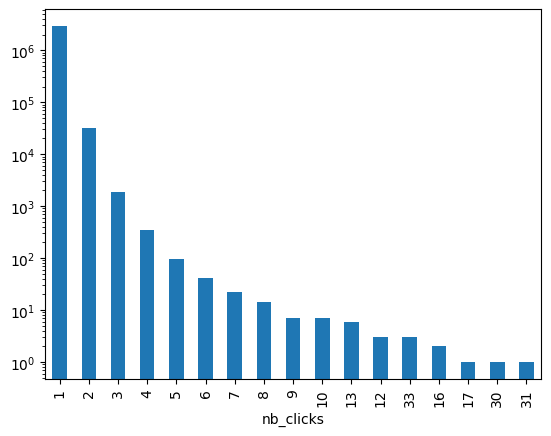

In [10]:
collaborative_df['nb_clicks'].value_counts().plot(kind='bar', logy=True)

In [12]:
collaborative_df = collaborative.aggregate_clicks(df_clicks=df_clicks, max_clicks=5)

<Axes: xlabel='nb_clicks'>

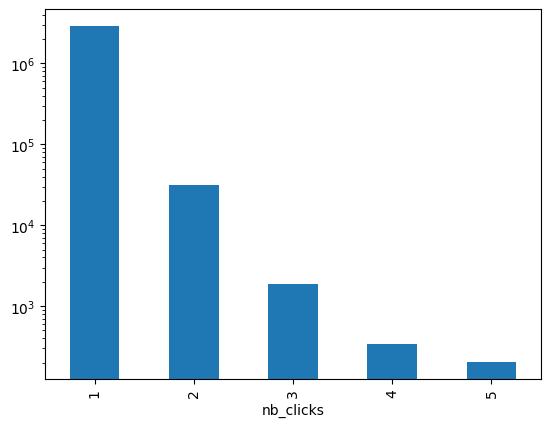

In [13]:
collaborative_df['nb_clicks'].value_counts().plot(kind='bar', logy=True)

<Axes: >

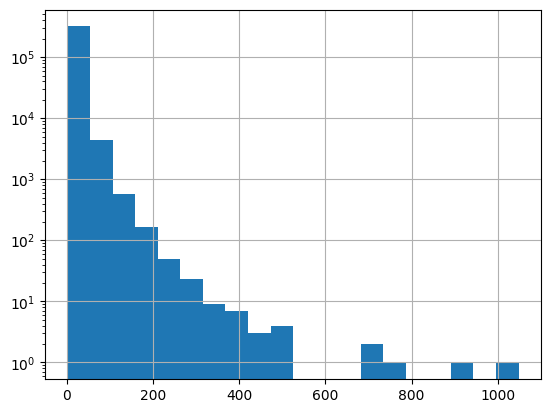

In [14]:
collaborative_df['user_id'].value_counts().hist(bins=20, log=True)

In [15]:
def fr_format(number):
    return format(number, ',.0f').replace(',', ' ')

nb_users = len(collaborative_df['user_id'].unique())
nb_articles = len(collaborative_df['article_id'].unique())
matrix_size = nb_users * nb_articles
print(f"Nombre d'utilisateurs: {fr_format(nb_users)}")
print(f"Nombre d'articles: {fr_format(nb_articles)}")
print(f"Taille de la matrice: {fr_format(matrix_size)}")

Nombre d'utilisateurs: 322 897
Nombre d'articles: 46 033
Taille de la matrice: 14 863 917 601


In [16]:
sample_df = collaborative.aggregate_clicks(df_clicks=df_clicks, max_clicks=5, n_users=sample_users_size)
algo = collaborative.train(sample_df, verbose=True)

RMSE: 0.1305


In [17]:
collaborative.get_users()

[45833, 127528, 234342, 23033, 183235, 44439, 262364, 161766, 192460, 38399]

In [18]:
collaborative.recommand(45833)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


Current user articles: 16129, 42770, 58235, 68248, 87181, 157478, 158082, 158192, 202355, 233464, 236400, 257291, 271770, 272143, 277681, 277712, 283026, 283239, 284170, 284514, 284547, 285095, 285101, 285331, 285333, 285335, 285342, 285422, 285435, 285446, 285648, 285664, 285754, 285904, 286060, 286161, 286336, 289003, 293301, 308156, 336221, 336223, 336250, 351364, 352121
Recommended user articles: 364017, 363984, 363976, 363967, 363962, 363952


[364017, 363984, 363976, 363967, 363962, 363952]